In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
train = pd.read_csv('train.csv')
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [278]:
train.shape

(22083, 45)

In [279]:
train.duplicated().sum()

0

In [280]:
train.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [281]:
test = pd.read_csv('test.csv')
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [282]:
test.shape

(9465, 43)

In [283]:
test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Test 1                         

----------

In [284]:
train['Patient Age'] = train['Patient Age'].fillna(0)
train['Patient Age'] = train['Patient Age'].astype(int)

In [285]:
train['Inherited from father'] = train['Inherited from father'].fillna('No data')
test['Inherited from father'] = test['Inherited from father'].fillna('No data')

In [286]:
train['Maternal gene'] = train['Maternal gene'].fillna('No data')
test['Maternal gene'] = test['Maternal gene'].fillna('No data')

In [287]:
train['Mother\'s age'] = train['Mother\'s age'].fillna(train['Mother\'s age'].mean())

In [288]:
train['Father\'s age'] = train['Father\'s age'].fillna(train['Father\'s age'].mean())

In [289]:
test['Parental consent'] = test['Parental consent'].replace({'-99' : 'Yes'})

In [290]:
train['Respiratory Rate (breaths/min)'] = train['Respiratory Rate (breaths/min)'].fillna(train['Respiratory Rate (breaths/min)'].value_counts().index[0])
test['Respiratory Rate (breaths/min)'] = test['Respiratory Rate (breaths/min)'].fillna(test['Respiratory Rate (breaths/min)'].value_counts().index[0])

In [291]:
train['Respiratory Rate (breaths/min)'] = train['Respiratory Rate (breaths/min)'].astype(str)
train['Respiratory Rate (breaths/min)']= train['Respiratory Rate (breaths/min)'].apply(lambda x:x.split()[0])

In [292]:
test['Respiratory Rate (breaths/min)'] = test['Respiratory Rate (breaths/min)'].astype(str)
test['Respiratory Rate (breaths/min)']= test['Respiratory Rate (breaths/min)'].apply(lambda x:x.split()[0])

In [293]:
train['Heart Rate (rates/min'] = train['Heart Rate (rates/min'].fillna(train['Heart Rate (rates/min'].value_counts().index[0])
test['Heart Rate (rates/min'] = test['Heart Rate (rates/min'].fillna(test['Heart Rate (rates/min'].value_counts().index[0])

In [294]:
train['Heart Rate (rates/min'] = train['Heart Rate (rates/min'].astype(str)
train['Heart Rate (rates/min'] = train['Heart Rate (rates/min'].apply(lambda x:x.split()[0])

In [295]:
test['Heart Rate (rates/min'] = test['Heart Rate (rates/min'].astype(str)
test['Heart Rate (rates/min'] = test['Heart Rate (rates/min'].apply(lambda x:x.split()[0])

In [296]:
train['Parental consent'] = train['Parental consent'].fillna(train['Parental consent'].value_counts().index[0])

In [297]:
train['Follow-up'] = train['Follow-up'].fillna(train['Follow-up'].value_counts().index[0])

In [298]:
train['Gender'] = train['Gender'].fillna(train['Gender'].value_counts().index[0])

In [299]:
x = ['Birth asphyxia']
for i in x:
    train[i] = train[i].replace({'Not available' : 'No record'})
    test[i] = test[i].replace({'Not available' : 'No record', '-99' : 'No record'})

In [300]:
train['Birth asphyxia'] = train['Birth asphyxia'].fillna(train['Birth asphyxia'].value_counts().index[0])

In [301]:
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].fillna('No record')

In [302]:
train['Place of birth'] = train['Place of birth'].fillna('No record')

In [303]:
train['Folic acid details (peri-conceptional)'] = train['Folic acid details (peri-conceptional)'].fillna('No record')

In [304]:
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].fillna('No record')

In [305]:
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].replace({'-': 'No record'})

In [306]:
train['H/O serious maternal illness'] = train['H/O serious maternal illness'].fillna('No record')

In [307]:
train['H/O substance abuse'] = train['H/O substance abuse'].replace({'-' : 'No record'})
train['H/O substance abuse'] = train['H/O substance abuse'].fillna('No record')

In [308]:
x = ['H/O serious maternal illness', '']

In [309]:
train['Assisted conception IVF/ART'] = train['Assisted conception IVF/ART'].fillna('No record')

In [310]:
train['History of anomalies in previous pregnancies'] = train['History of anomalies in previous pregnancies'].fillna('No record')

In [311]:
train['No. of previous abortion'] = train['No. of previous abortion'].fillna(2.0)
train['No. of previous abortion'] = train['No. of previous abortion'].astype(int)

In [312]:
train['Birth defects'] = train['Birth defects'].fillna('No record')

In [313]:
train['White Blood cell count (thousand per microliter)'] = train['White Blood cell count (thousand per microliter)'].fillna(train['White Blood cell count (thousand per microliter)'].mean())

In [314]:
train['Blood test result'] = train['Blood test result'].fillna('No record')

In [315]:
x = ['Symptom 1', 'Symptom 2', 'Symptom 3']
for i in x:
    train[i] = train[i].fillna(1)
    train[i] = train[i].astype(int)

In [316]:
x = ['Symptom 4', 'Symptom 5']
for i in x:
    train[i] = train[i].fillna(0)
    train[i] = train[i].astype(int)

In [317]:
x = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
for i in x:
    test[i] = test[i].replace({'True': 1, 'False': 0})
    test[i] = test[i].astype(int)

In [318]:
x = ['Test 1', 'Test 2', 'Test 3', 'Test 5']
for i in x:
    train[i] = train[i].fillna(0)
    train[i] = train[i].astype(int)

In [319]:
train['Test 4'] = train['Test 4'].fillna(1)
train['Test 4'] = train['Test 4'].astype(int)

In [320]:
x = ['Test 1', 'Test 2', 'Test 3', 'Test 5']
for i in x:
    test[i] = test[i].replace({-99 : 0})

In [321]:
test['Test 4'] = test['Test 4'].replace({-99 : 1})

In [322]:
train = train.drop(['Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute'], axis = 1)
test = test.drop(['Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute'], axis = 1)

In [323]:
x = ['Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Parental consent']
for i in x:
    train[i] = train[i].replace({'Yes' : 1, 'No' : 0, 'No data' : 2})
    train[i] = train[i].astype(int)
    test[i] = test[i].replace({'Yes' : 1, 'No' : 0, 'No data' : 2})
    test[i] = test[i].astype(int)

-------------------

In [324]:
test['Respiratory Rate (breaths/min)'] = test['Respiratory Rate (breaths/min)'].replace({'-99' : 'No record'})

In [325]:
test['Heart Rate (rates/min'] = test['Heart Rate (rates/min'].replace({'-99' : 'No record'})

In [326]:
test['Follow-up'] = test['Follow-up'].replace({'-99' : 'No record'})

In [327]:
test['Gender'] = test['Gender'].replace({'-99' : 'No record'})

In [328]:
test['Autopsy shows birth defect (if applicable)'] = test['Autopsy shows birth defect (if applicable)'].replace({'-99' : 'No record'})

In [329]:
test['Place of birth'] = test['Place of birth'].replace({'-99' : 'No record'})

In [330]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [331]:
x = ['Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [332]:
test['Folic acid details (peri-conceptional)'] = test['Folic acid details (peri-conceptional)'].replace({'-99' : 'No record'})

In [333]:
test['H/O serious maternal illness'] = test['H/O serious maternal illness'].replace({'-99' : 'No record'})

In [334]:
test['H/O radiation exposure (x-ray)'] = test['H/O radiation exposure (x-ray)'].replace({'-99' : 'No record', '-' : 'No record'})

In [335]:
test['H/O substance abuse'] = test['H/O substance abuse'].replace({'-99' : 'No record', '-' : 'No record'})

In [336]:
x = ['Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [337]:
test['Assisted conception IVF/ART'] = test['Assisted conception IVF/ART'].replace({'-99' : 'No record'})

In [338]:
test['History of anomalies in previous pregnancies'] = test['History of anomalies in previous pregnancies'].replace({'-99' : 'No record'})

In [339]:
test['Birth defects'] = test['Birth defects'].replace({'-99' : 'No record'})

In [340]:
test['Blood test result'] = test['Blood test result'].replace({'-99' : 'No record'})

In [341]:
x = ['Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [342]:
train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64

In [343]:
df = train[train['Genetic Disorder'].notnull()]
df.shape

(19937, 40)

In [344]:
train[train['Genetic Disorder'].isnull()]

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
1,PID0x25d5,4,1,1,0,0,4.910669,34.526454,23.000000,1,...,0,5.522560,3,1,1,1,1,0,NaN,Cystic fibrosis
13,PID0xc25,0,1,0,0,1,4.807778,28.000000,41.972852,1,...,0,8.440593,1,0,1,1,0,0,NaN,Leigh syndrome
52,PID0x264c,0,1,0,1,0,4.921015,24.000000,41.972852,1,...,2,7.486224,4,1,0,0,0,0,NaN,Tay-Sachs
68,PID0x20e7,8,1,0,2,1,5.259736,34.526454,41.972852,0,...,1,9.719873,4,1,0,1,0,0,NaN,Mitochondrial myopathy
75,PID0x2447,2,1,1,1,1,4.927532,40.000000,49.000000,1,...,2,5.169576,1,1,1,0,0,1,NaN,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22051,PID0x54e1,0,1,1,0,1,4.664764,42.000000,30.000000,1,...,2,7.486224,3,0,0,0,0,0,NaN,Tay-Sachs
22055,PID0x53fd,1,0,0,2,0,4.516767,34.526454,42.000000,1,...,0,7.486224,4,1,1,0,0,1,NaN,Tay-Sachs
22070,PID0x2666,3,1,0,0,0,4.671013,40.000000,39.000000,1,...,0,4.967410,2,0,1,1,1,1,NaN,Diabetes
22073,PID0xbd,13,1,1,0,1,4.874635,44.000000,62.000000,0,...,1,7.486224,3,0,0,0,1,1,NaN,Leigh syndrome


In [345]:
z = train[train['Genetic Disorder'] == 'Mitochondrial genetic inheritance disorders']
z['Disorder Subclass'].value_counts()

Leigh syndrome                         4683
Mitochondrial myopathy                 3971
Leber's hereditary optic neuropathy     587
Name: Disorder Subclass, dtype: int64

In [346]:
y = train[train['Genetic Disorder'] == 'Multifactorial genetic inheritance disorders']
y['Disorder Subclass'].value_counts()

Diabetes       1653
Alzheimer's     133
Cancer           91
Name: Disorder Subclass, dtype: int64

In [347]:
k = train[train['Genetic Disorder'] == 'Single-gene inheritance diseases']
k['Disorder Subclass'].value_counts()

Cystic fibrosis    3145
Tay-Sachs          2556
Hemochromatosis    1228
Name: Disorder Subclass, dtype: int64

In [351]:
train.loc[train['Disorder Subclass'].eq('Leigh syndrome') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Mitochondrial genetic inheritance disorders'

In [353]:
train.loc[train['Disorder Subclass'].eq('Mitochondrial myopathy') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Mitochondrial genetic inheritance disorders'
train.loc[train['Disorder Subclass'].eq("Leber's hereditary optic neuropathy") & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Mitochondrial genetic inheritance disorders'

In [355]:
train.loc[train['Disorder Subclass'].eq('Diabetes') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Multifactorial genetic inheritance disorders'
train.loc[train['Disorder Subclass'].eq("Alzheimer's") & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Multifactorial genetic inheritance disorders'
train.loc[train['Disorder Subclass'].eq('Cancer') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Multifactorial genetic inheritance disorders'

In [356]:
train.loc[train['Disorder Subclass'].eq('Cystic fibrosis') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Single-gene inheritance diseases'
train.loc[train['Disorder Subclass'].eq("Tay-Sachs") & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Single-gene inheritance diseases'
train.loc[train['Disorder Subclass'].eq('Hemochromatosis') & train['Genetic Disorder'].isnull(), 'Genetic Disorder'] = 'Single-gene inheritance diseases'

In [357]:
train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     11174
Single-gene inheritance diseases                 8371
Multifactorial genetic inheritance disorders     2260
Name: Genetic Disorder, dtype: int64

In [359]:
train['Disorder Subclass'].value_counts()

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

In [360]:
train.loc[train['Genetic Disorder'].eq('Mitochondrial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = 'Leigh syndrome'
train.loc[train['Genetic Disorder'].eq('Mitochondrial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = 'Mitochondrial myopathy'
train.loc[train['Genetic Disorder'].eq('Mitochondrial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = "Leber's hereditary optic neuropathy"

In [362]:
train.loc[train['Genetic Disorder'].eq('Single-gene inheritance diseases') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = 'Cystic fibrosis'
train.loc[train['Genetic Disorder'].eq('Single-gene inheritance diseases') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = 'Tay-Sachs'
train.loc[train['Genetic Disorder'].eq('Single-gene inheritance diseases') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = "Hemochromatosis"

In [363]:
train.loc[train['Genetic Disorder'].eq('Multifactorial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = 'Diabetes'
train.loc[train['Genetic Disorder'].eq('Multifactorial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = "Alzheimer's"
train.loc[train['Genetic Disorder'].eq('Multifactorial genetic inheritance disorders') & train['Disorder Subclass'].isnull(), 'Disorder Subclass'] = "Cancer"

In [364]:
train['Disorder Subclass'].value_counts()

Leigh syndrome                         6121
Mitochondrial myopathy                 4405
Cystic fibrosis                        4183
Tay-Sachs                              2833
Diabetes                               2011
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

In [366]:
train = train.dropna()

In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 22082
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21805 non-null  object 
 1   Patient Age                                       21805 non-null  int32  
 2   Genes in mother's side                            21805 non-null  int32  
 3   Inherited from father                             21805 non-null  int32  
 4   Maternal gene                                     21805 non-null  int32  
 5   Paternal gene                                     21805 non-null  int32  
 6   Blood cell count (mcL)                            21805 non-null  float64
 7   Mother's age                                      21805 non-null  float64
 8   Father's age                                      21805 non-null  float64
 9   Status           

In [368]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   int32  
 3   Inherited from father                             9465 non-null   int32  
 4   Maternal gene                                     9465 non-null   int32  
 5   Paternal gene                                     9465 non-null   int32  
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Mother's age                                      9465 non-null   int64  
 8   Father's age                                      9465 non-null   int64  
 9   Status             

In [369]:
newtrain = train.drop('Patient Id', axis = 1)

In [370]:
newtest = test.drop('Patient Id', axis = 1)

In [371]:
newtrain['Disorder Subclass'].value_counts()

Leigh syndrome                         6121
Mitochondrial myopathy                 4405
Cystic fibrosis                        4183
Tay-Sachs                              2833
Diabetes                               2011
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

In [372]:
newtrain['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     11174
Single-gene inheritance diseases                 8371
Multifactorial genetic inheritance disorders     2260
Name: Genetic Disorder, dtype: int64

In [373]:
a = newtrain[newtrain['Genetic Disorder'] == 'Mitochondrial genetic inheritance disorders']
a.head(2)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2,1,0,1,0,4.760603,34.526454,41.972852,0,0,...,1,9.857562,0,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
3,12,1,0,1,0,4.705280,21.000000,41.972852,1,1,...,2,7.919321,2,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [374]:
a['Disorder Subclass'].value_counts()

Leigh syndrome                         6121
Mitochondrial myopathy                 4405
Leber's hereditary optic neuropathy     648
Name: Disorder Subclass, dtype: int64

In [375]:
b = newtrain[newtrain['Genetic Disorder'] == 'Single-gene inheritance diseases']
b['Disorder Subclass'].value_counts()

Cystic fibrosis    4183
Tay-Sachs          2833
Hemochromatosis    1355
Name: Disorder Subclass, dtype: int64

In [376]:
c = newtrain[newtrain['Genetic Disorder'] == 'Multifactorial genetic inheritance disorders']
c['Disorder Subclass'].value_counts()

Diabetes       2011
Alzheimer's     152
Cancer           97
Name: Disorder Subclass, dtype: int64

---------

For Genetic Disorder

In [377]:
gen_train = newtrain.drop('Disorder Subclass', axis = 1)
gen_test = newtest

In [378]:
gen_train['Genetic Disorder'] = le.fit_transform(gen_train['Genetic Disorder'])

In [379]:
x = gen_train.drop('Genetic Disorder', axis = 1)
y = gen_train['Genetic Disorder']

In [380]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [381]:
from sklearn.metrics import accuracy_score, classification_report

In [382]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5773905067645035


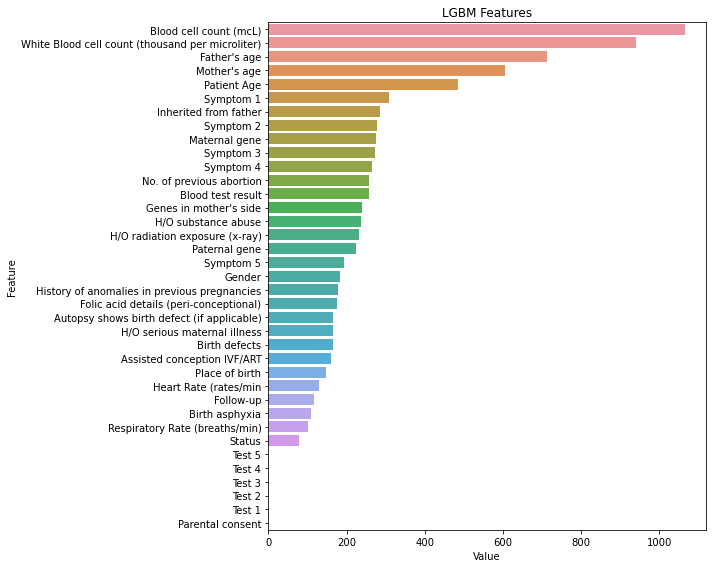

In [383]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [384]:
x_train = gen_train.drop(['Genetic Disorder', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent'], axis = 1)
y_train = gen_train['Genetic Disorder']
x_test = gen_test.drop(['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent'], axis = 1)
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred2 = lgbm.fit(x_train, y_train).predict(x_test)

In [385]:
type(y_pred2)

numpy.ndarray

------------------------

For Disorder

In [386]:
a = pd.DataFrame({'Genetic Disorder' : le.inverse_transform(y_pred2)})

In [387]:
a.shape

(9465, 1)

In [388]:
a.head()

,Genetic Disorder
0,Single-gene inheritance diseases
1,Single-gene inheritance diseases
2,Single-gene inheritance diseases
3,Single-gene inheritance diseases
4,Multifactorial genetic inheritance disorders


In [389]:
dis_train = newtrain
dis_test = pd.concat([newtest, a], axis = 1)

In [390]:
dis_test.shape

(9465, 38)

In [391]:
dis_test.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
0,6,0,1,0,0,4.981655,38,61,0,2,...,2,0,-99.000000,4,1,1,1,1,1,Single-gene inheritance diseases
1,10,1,0,2,1,5.118890,33,53,0,1,...,-99,0,8.179584,3,0,0,0,1,0,Single-gene inheritance diseases
2,5,0,2,0,0,4.876204,48,60,1,1,...,0,2,-99.000000,4,0,0,1,1,0,Single-gene inheritance diseases
3,13,0,1,1,0,4.687767,25,55,0,0,...,-99,2,6.884071,3,1,0,1,0,1,Single-gene inheritance diseases
4,5,0,2,2,1,5.152362,41,38,1,2,...,-99,0,6.195178,3,1,1,1,1,0,Multifactorial genetic inheritance disorders


In [392]:
dis_train['Genetic Disorder'] = le.fit_transform(dis_train['Genetic Disorder'])

In [393]:
dis_test['Genetic Disorder'] = le.fit_transform(dis_test['Genetic Disorder'])

In [394]:
dis_train['Disorder Subclass'] = le.fit_transform(dis_train['Disorder Subclass'])

In [395]:
dis_train.head(2)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2,1,0,1,0,4.760603,34.526454,41.972852,0,0,...,1,9.857562,0,1,1,1,1,1,0,5
1,4,1,1,0,0,4.910669,34.526454,23.000000,1,1,...,0,5.522560,3,1,1,1,1,0,2,2


In [396]:
dis_train['Disorder Subclass'].value_counts()

6    6121
7    4405
2    4183
8    2833
3    2011
4    1355
5     648
0     152
1      97
Name: Disorder Subclass, dtype: int64

In [397]:
x = dis_train.drop('Disorder Subclass', axis = 1)
y = dis_train['Disorder Subclass']

In [398]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [399]:
from sklearn.metrics import accuracy_score, classification_report

In [400]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7108461362072919


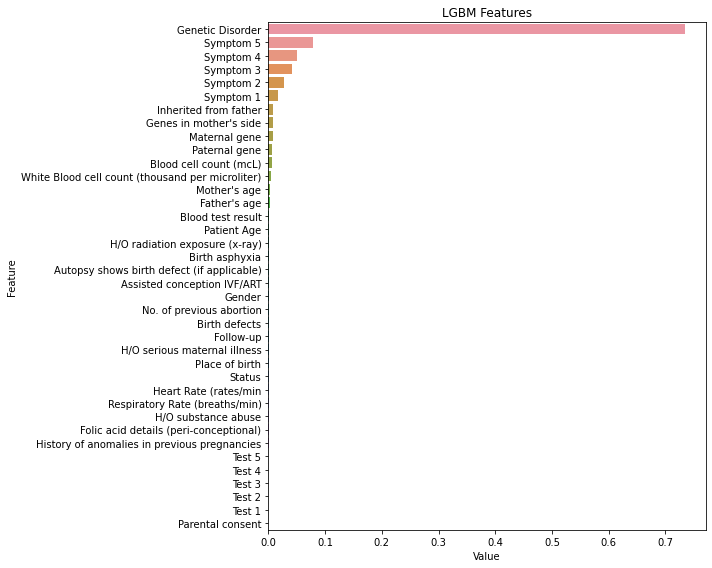

In [401]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [402]:
x_train = dis_train.drop(['Disorder Subclass', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent'], axis = 1)
y_train = dis_train['Disorder Subclass']
x_test = dis_test.drop(['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent'], axis = 1)
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred1 = gab.fit(x_train, y_train).predict(x_test)

In [403]:
y_pred1

array([2, 8, 8, ..., 7, 2, 5])

In [404]:
b = pd.DataFrame({'Disorder Subclass' : le.inverse_transform(y_pred1)})
b.head()

,Disorder Subclass
0,Cystic fibrosis
1,Tay-Sachs
2,Tay-Sachs
3,Cystic fibrosis
4,Diabetes


In [405]:
solution = pd.DataFrame({'Patient Id' : test['Patient Id'], 'Genetic Disorder' : a['Genetic Disorder'],
                        'Disorder Subclass' : b['Disorder Subclass']})
solution.to_csv('Solution.csv', index = False)